In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv(
    Path("../Resources/lending_data.csv")
)

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df['loan_status']

# Separate the X variable, the features
X = lending_df.drop(columns=['loan_status'])

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
acc_score = balanced_accuracy_score(y_test, testing_predictions)
print(acc_score)
#pretty good score


0.9520479254722232


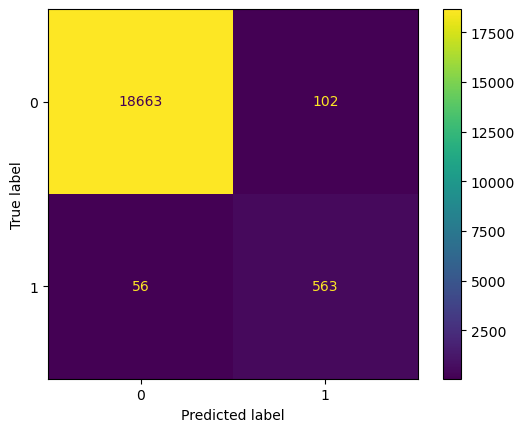

[[18663   102]
 [   56   563]]


In [11]:
# Generate a confusion matrix for the model
con_matrix = confusion_matrix(y_test, testing_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix,
                              display_labels=lr_model.classes_)
disp.plot()
plt.show()

print(con_matrix)

In [12]:
# Print the classification report for the model
class_report = classification_report(y_test, testing_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** This Linear Regression Model has a high overall accuracy rating of 94% so it seems to do pretty well overall. It does appear noticably worse at predicting high risk loans (1), particularly in reguards to precision. Healthy loans are precicted with a staggering 100% precision, although the recall being 99% could mean a 1% room for error

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [13]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# Assign a random_state parameter of 1 to the model
randomizer = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_ran, y_ran = randomizer.fit_resample(X_train, y_train)

In [14]:
# Count the distinct values of the resampled labels data
y_ran.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [15]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model2 = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
lr_model_ran = logistic_regression_model2.fit(X_ran, y_ran)

# Make a prediction using the testing data
testing_predictions_randomized = logistic_regression_model2.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Print the balanced_accuracy score of the model 
acc_score2 = balanced_accuracy_score(y_test, testing_predictions_randomized)
print(acc_score2)

0.9936781215845847


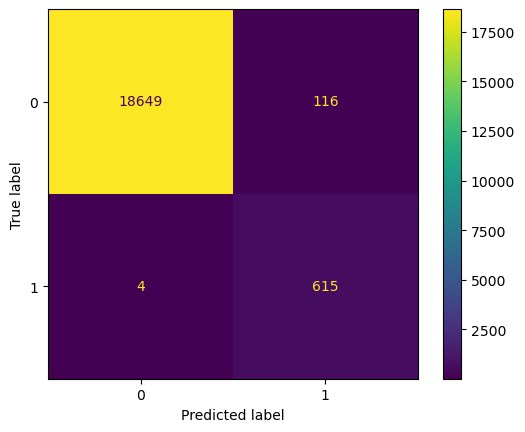

[[18649   116]
 [    4   615]]


In [17]:
# Generate a confusion matrix for the model
con_matrix2 = confusion_matrix(y_test, testing_predictions_randomized)
disp2 = ConfusionMatrixDisplay(confusion_matrix=con_matrix2,
                              display_labels=lr_model_ran.classes_)
disp2.plot()
plt.show()
print(con_matrix2)

In [18]:
# Print the classification report for the model
class_report2 = classification_report(y_test, testing_predictions_randomized)
print(class_report2)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** This Linear Regression Model does seem to predict both Healthy Loans and High Risk Loans reasonably well. Compared to its predecessor, this Linear Regression model actually has slightly higher percentages for its Accuracy across the board, with the only decrease in value occuring in with the precision of predicting High Risk Loans